## Research on data about Russian film distribution.



### Description of the project

The Ministry of Culture of the Russian Federation is the client for this research. We need to study the Russian film distribution market and identify current trends. We will focus on films that have received government support. We will try to answer the question of how interesting such films are to the viewer. Our task is to preprocess the data and study it in order to find interesting characteristics and dependencies that exist in the Russian film distribution market. We will work with data published on the portal of open data of the Ministry of Culture of the Russian Federation. The data set contains information on film distribution licenses, collections and government support for films, as well as information from the Kinopoisk website.

#### Описание данных:

The `mkrf_movies` table contains information from the state licensing registry. One film can have several distribution licenses. The `budget` column already includes the full amount of government support. The data in this column is only for those films that received government support.

- `title` — movie title;
- `puNumber` — license number;
- `show_start_date` - movie premiere date;
- `type` — movie type;
- `film_studio` - production studio;
- `production_country` - country of origin;
- `director` — director;
- `producer` — producer;
- `age_restriction` - age category;
- `refundable_support` — amount of state support repayable funds;
- `nonrefundable_support` - the amount of non-refundable state support funds;
- `financing_source` - source of government funding;
- `budget` - the total budget of the movie;
- `ratings` — movie rating on KinoPoisk;
- `genres` — movie genre;
- `box_office` — revenue in rubles.


The `mkrf_shows` table contains information about movie screenings in Russian cinemas.

- `puNumber` — license number;
- `box_office` — revenue in rubles.

###  Let's open the files with the data of each of the tables and combine them into one dataframe.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
        </div>
    </div>
</div>

#### Let's examine general information about the data of the `mkrf_movies.csv` table.

In [1]:
# import the libraries necessary for work and display the first 10 rows of the mkrf_movies table
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
except:
    mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

mkrf_movies.head(10)

#pd.options.mode.chained_assignment = None 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [2]:
# get general information about the data of the mkrf_movies source table by applying the info() method to it:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

#### Let's study the general information about the data of the table `mkrf_shows.csv`

In [3]:
# we remove the output of numbers with scientific notation
pd.options.display.float_format = '{:.2f}'.format

# then, display the first 10 rows of the mkrf_movies table
try:
    mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
except:
    mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

mkrf_shows.head(10)

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79
5,111000119,4293649.51
6,111000212,200.00
7,111000216,355567.00
8,111000313,710.00
9,111000314,1607970.00


In [4]:
# get general information about the data of the mkrf_movies source table by applying the info() method to it:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


#### Let's merge the `mkrf_movies` and `mkrf_shows` tables into one using the `merge()` method, by the `puNumber` column.

Let's merge the data in such a way that all objects from the `mkrf_movies` dataset will be necessarily included in our resulting dataframe. Note, that the data type in the `puNumber` column is different from the data in initial dataframe. In `mkrf_movies` table the data type is `object`, while in `mkrf_shows` it is `int64`. Let's find the records of `mkrf_movies` which contain non-numeric characters by applying boolean filtering.

In [5]:
mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


It can be assumed that there are spaces in row 804. To remove them, use the `strip()` method. In row 1787, the value "no" will be replaced by a zero value. Let's convert these strings to integers using the `to_numeric()` function. After the replacement, we check again the data type of the `puNumber` column using the `dtype` method.

In [6]:
# access the required rows using the loc method
mkrf_movies.loc[804, 'puNumber'] = mkrf_movies.loc[804, 'puNumber'].strip()
mkrf_movies.loc[1797, 'puNumber'] = '0'

mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'])
mkrf_movies['puNumber'].dtype


dtype('int64')

#### After we make sure that the data type in both dataframes is the same, let's add information about movie screenings to the dataframe with movies.

In [7]:
# merge tables by 'puNumber', 'puNumber' tables mkrf_movies are included in the final table df
df = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')

# create a backup
df_raw = df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Output:** We see that all 3158 `box_office` values have been attached without loss of data. Let's continue to preprocess the data.

## Data preprocessing

### Checking and converting data type in the `df` dataset 

Let's check the data type in the dataframe and convert it where necessary. From the paragraph 1.2.4 we see that the `show_start_date` column has an object type, and is not the `datetime` date type we need for the subsequent extraction of the day and month. `ratings` column values are not integer values. Let's convert the data type in the selected columns as follows:

- `show_start_date` - convert object data type to datetime. To work with time, it is necessary to bring the data into the `datetime` format, this will allow us to receive the parameters of interest to us in the future.
- `ratings` - `object` will be replaced by `float64`. Since the rating on Kinopoisk passes on a 10-point scale, where 1 is the worst, and 10 is a masterpiece. We will also look at the unique rating values to check if there are values that include not only floats.
- `puNumber` - we will bring the name of this column to lower case as a good style.

#### Column `show_start_date`

In [8]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df['show_start_date'].dtype

datetime64[ns, UTC]

#### Column `ratings`

In [9]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Some of the data is presented in percentage format, but for Kinopoisk ratings, a ten-point system is officially used. Let's change films with a rating presented as a percentage.

In [10]:
# we create a list where the rating values are represented as a percentage
unk_ratings = ['99%', '28%', '97%','83%', '64%',
                  '91%', '94%', '62%', '79%', '90%',
                  '19%', '88%', '89%', '98%']

In [11]:
# use filtering using the query method and sort by rating ascending
df.query('ratings in @unk_ratings').sort_values(by='ratings')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3431,Наурыз,131000217,2017-03-09 12:00:00+00:00,Художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,19%,комедия,37960.00
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1740.00
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",528732557.70
7159,Анна Каренина. Интимный дневник,111013919,2019-10-23 12:00:00+00:00,Художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,79%,драма,182882.50
2680,Год Белого Слона,111003915,2015-04-08 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,79%,семейный,NaN
3446,Короткие истории о любви - 4,126006316,2016-12-30 12:00:00+00:00,Прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,2266408.00
5455,Вечный холод,111006417,2017-08-28 12:00:00+00:00,Художественный,"ЗАО ""Производственный комплекс ""ГЛАВКИНО"", ООО...",Россия,А.Мигачев,И.Бачурин,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,"фэнтези,боевик,триллер",NaN
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1429859.00
5332,Добыча.,121009411,2011-06-15 12:00:00+00:00,Художественный,Афтер Дарк Филмз,США,Патрик Сиверсен,"Закари Ти Брайан, Кристофер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,88%,"фантастика,боевик,триллер",NaN


After manual search of these films on the Kinopoisk website (https://www.kinopoisk.ru/), you can see that at the time the data was generated, there were not enough ratings for them, the rating was being formed. Let's replace the values of the ratings of these paintings with NaN and convert the values to a floating point data type using the `to_numeric` method.

In [12]:
# find rows where rating values are presented as a percentage
df.loc[df['ratings'].isin(unk_ratings), 'ratings'] = np.nan

In [13]:
df['ratings'] = pd.to_numeric(df['ratings'])

In [14]:
# let's check the replaced values
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

#### Column `puNumber`

In [15]:
# convert this column to lower case.
df.columns = df.columns.str.lower()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   punumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Conclusion:** Initially, some of the data types in the columns did not seem as a correct types. We have converted the data to the data types we need for further work, using several classic preprocessing tools. Also fixed the style of the `puNumber` column by applying lower case.

### Missing values analysis

#### Let's find and study the missing values in the columns, sorting the values in descending order, and visualize the percentage of missing values in the columns of our dataset.

In [17]:
df.isna().sum().sort_values(ascending=False)

refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
box_office               4328
ratings                   996
genres                    976
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
punumber                    0
show_start_date             0
type                        0
age_restriction             0
dtype: int64

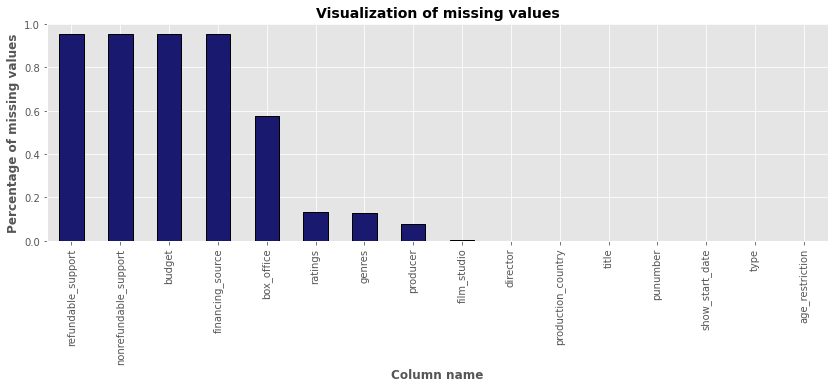

In [18]:
# use a visually friendly style and adjust the grid, color and font size settings
plt.style.use('ggplot')

# average of missing values sorted in descending order
df.isna().mean().sort_values(ascending=False).plot(
    kind='bar', figsize=(14,4), 
    grid=True, color='midnightblue', 
    edgecolor='black', linewidth=1,
)
plt.title('Visualization of missing values',fontsize=14, fontweight="bold")
plt.xlabel('Column name',fontweight="bold")
plt.ylabel('Percentage of missing values', fontweight="bold")
plt.show()

#### Columns `refundable_support`, `nonrefundable_support`, `budget`, `financing_source`

In [19]:
print('Proportion of missing values in "budget": {:.2%}'.format(df['budget'].isna().mean()))

Proportion of missing values in "budget": 95.57%


A significant amount of data in columns `refundable_support`, `nonrefundable_support`, `budget`, `financing_source` is missing. In the description of the data **p. 1.1.1** states that the `budget` column already includes the full amount of government support. The data in this column is only for those films that received government support. We will not replace missing values or remove them, because the proportion of gaps in these columns is large and will lead to distortion in our future data analysis. We can assume that gaps in the data are due to the fact that most of the films in our dataset did not receive government support. It could be for both movies produced in Russia and foreign countries.

#### Column `box_office`

The `box_office` data was obtained from another table, which contained information about screenings of only certain films in Russian cinemas and had a number of 3158 values. Accordingly, not all films in our dataset will have box office information. Let's leave the missing values without any changes.

#### Column `ratings`

In [20]:
print('Missing values in "ratings": {:.2%}'.format(df['ratings'].isna().mean()))

Missing values in "ratings": 13.30%


In [21]:
df.loc[df['ratings'].isna() == True].sample(8)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5254,"Людвиг Минкус. Баядерка /По драме Калидасы ""Ша...",126001511,2011-05-17 12:00:00+00:00,Прочие,Опус Арте,Великобритания,хореография Мариуса Петипа в редакции Наталии ...,"Театр Ковент-Гарден, сэр Дональд Гордон",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3407,МУЛЬТ в кино. Выпуск № 51,114000717,2017-03-31 12:00:00+00:00,Анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3718,В ожидании Шарлотты Корде,111018316,2016-12-22 12:00:00+00:00,Художественный,"ООО ""ХитФильм Продакшн""",Россия,А.Атанесян,А.Шипулина,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6516,"Мы живем в России (серия 54 ""Архангельская обл...",114009018,2018-12-27 12:00:00+00:00,Анимационный,"ЗАО ""Аэроплан""",Россия,А.Почивалов,Ю.Софронова,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6518,"Мы живем в России (серия 52 ""Республика Калмык...",114009318,2018-12-27 12:00:00+00:00,Анимационный,"ЗАО ""Аэроплан""",Россия,А.Почивалов,Ю.Софронова,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6405,Птицы в гнезде - до осени,112012618,2018-11-15 12:00:00+00:00,Документальный,"ООО ""Студия 9 марта""",Россия,Г.Калинина,Г.Калинина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5848,Пчёлка Майя и Кубок мёда,124001918,2018-05-17 12:00:00+00:00,Анимационный,"Студия 100 Медиа, Студия Б Анимейшен","Германия, Австралия","Ноэль Клири, Серджо Делфино, Алекс Стадерманн","Бенджамин Еу, Трэйси Ленон, Брайн Розен",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,24176724.07
5450,Хэвенхёрст,121016517,2017-08-31 12:00:00+00:00,Художественный,"Протокол Энтертэйнмент, Твистед Пикчерс, Парис...",США,Эндрю С.Эрин,"Эндрю С.Эрин, Тоска Маск, Джина Пейнбьянко",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,3915309.00


After a manual search for films with missing values in the ratings on the Kinopoisk website (https://www.kinopoisk.ru/), it can be assumed that at the time our initial data was formed, there were not enough ratings for some films, and thus the rating was in the process of being formed. Based on the information, Kinopoisk begins to rank films that have scored more than 100 ratings. We cannot in any way replace the missing rating values, and we will not remove them, since the proportion of gaps is significant and can distort our analysis.

#### Column `genres`

In [22]:
print('Missing values in a column "genres": {:.2%}'.format(df['genres'].isna().mean()))

Missing values in a column "genres": 13.04%


These categorical values will be used by us to create a new column, so for convenience, we will replace the gaps in the `genre` column data with "unknown" values using the `fillna` method. If necessary, it would be possible to restore the missing values using a manual search for each movie.

In [23]:
df['genres'] = df['genres'].fillna(value='unknown')

#### Column `producer`

In [24]:
print('Missing values in a column "producer": {:.2%}'.format(df['producer'].isna().mean()))

Missing values in a column "producer": 7.59%


Data from the specified column is not used in our analysis. We do not have to determine the relationship between the producer of the picture and any other characteristics, so there is no need to replace the missing values. If necessary, it would be possible to restore the missing values using a manual search for each movie.

#### Column `director`

In [25]:
print('Missing values in a column "director": {:.2%}'.format(df['director'].isna().mean()))

Missing values in a column "director": 0.12%


The share of passes is minimal. We have to work further with the values from this column. For convenience, we can replace the missing categorical values with "unknown" using the fillna method. If necessary, it would be possible to restore the missing values using a manual search for each movie.

In [26]:
df['director'] = df['director'].fillna(value='unknown')

#### Column `film_studio`

In [27]:
print('Missing values in a column "film_studio": {:.2%}'.format(df['film_studio'].isna().mean()))

Missing values in a column "film_studio": 0.24%


The percentage of missing values is minimal. Data from the specified column is not used in our analysis. Let's leave missing values unchanged.

#### Column `production_country`

In [28]:
df.loc[df['production_country'].isna() == True]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,unknown,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


There are only 2 missing values in this column. After a manual search for a picture on the Kinopoisk website, we find out that both pictures were made in Russia. We will make the necessary replacement.

In [29]:
df.loc[df['production_country'].isna() == True, 'production_country'] = 'Russia'

In [30]:
df.loc[[4441, 3186]]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Russia,unknown,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Russia,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00


**Conclusion:** Analysis of the missing values in all columns was made and proposal was to replace the gaps where it could be necessary and would not distort the original data for subsequent analysis. For clarity, we built a histogram with percentage of missing values in initial dataset. Omissions could be caused either by the absence of data during data entry, or human factor during data entry is also not excluded.

### Searching for duplicates in our dataframe.

Check the dataframe for obvious duplicates using the `duplicated()` method.

In [31]:
print('Duplicates amount is:', df.duplicated().sum())

Duplicates amount is: 0


#### Let's check for duplicates in the `title` column

In [32]:
# first, we display the first 10 values sorted by movie title
df[df['title'].duplicated(keep=False)].sort_values(by='title').head(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.10,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.70,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",NaN
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"боевик,триллер,драма",18439240.55
1494,13-й район: Кирпичные особняки,121008314,2014-04-25 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",750.00
1493,13-й район: Кирпичные особняки,221033314,2014-08-20 12:00:00+00:00,Художественный,"Брик Мэншэнс Продакшнз,Синэ+ Канал+, Д8, Европ...",Франция-Канада,Камиль Деламарр,"Люк Бессон, Клод Леже, Джонатан Вэнджер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.50,"боевик,криминал",NaN
4107,13.,221123710,2010-10-25 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN
4307,13.,121018110,2010-09-30 12:00:00+00:00,Художественный,"Барбариан Филмз, Магнет Медиа Групп, Морабито ...",США,Гела Баблуани,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.80,"триллер,драма,криминал",NaN


The presence of duplicates in these film titles may be due to the fact that one film may have several distribution licenses. This peculiarity was initially indicated in our data description. So, the same film could be shown at different times under different licenses and/or different distributors. These duplicates should not be modified or deleted.

#### Search for duplicates in the `punumber` column.

In [33]:
df[df['punumber'].duplicated(keep=False)]

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Two different films with the same release date are listed under the same rental license number. Perhaps the human factor took place on data entry. The number of the rental licenses is not fundamentally important for our analysis, so we decide to leave these duplicates as they are.

#### Let's search for hidden duplicates in the `production_country` column

In [34]:
# for visualization convenience, we display the result of the unique values of the column as a list
sorted(df['production_country'].unique().tolist())

[' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'Russia',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - 

In [35]:
# get the length of the list by movie titles
len(df['production_country'].unique())

951

We can see that there are hidden duplicates in the country names. So some names of producing countries are separated by "-", and others by ",". Let's define a lambda function that will remove the "-" character as a separator in strings with the names of manufacturing countries and also remove extra spaces in the names. At the same time, you can notice that there is a producing country with the value "2019". This is a clear data entry error. After manually searching for the painting "The Collini Case" on the Kinopoisk website, we will replace this value with "Germany".

In [36]:
df[df['production_country'] == '2019']

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19 12:00:00+00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"детектив,драма,криминал",NaN


In [37]:
# define a lambda function and apply it with the apply method overwriting the dataframe
df['production_country'] = df['production_country'].dropna().apply(lambda x: 
                                                                   ', '.join([x.strip() for x in x.split('-')]))

In [38]:
df.loc[7247, 'production_country'] = 'Германия'

In [39]:
sorted(df['production_country'].unique().tolist())

['CША',
 'Russia',
 'Австралия',
 'Австралия, Великобритания',
 'Австралия, Великобритания, Бельгия, Индия',
 'Австралия, Германия',
 'Австралия, Ирландия',
 'Австралия, Канада',
 'Австралия, Колумбия',
 'Австралия, США',
 'Австралия, Турция, США',
 'Австрия',
 'Австрия, Великобритания, Германия',
 'Австрия, Германия',
 'Австрия, Германия, Франция',
 'Австрия, Люксембург',
 'Австрия, Франция, Германия',
 'Азербайджан, Россия',
 'Аргентина',
 'Аргентина, Бразилия',
 'Аргентина, Испания',
 'Аргентина, Испания, Уругвай',
 'Аргентина, Мексика, Бразилия, Франция, США',
 'Аргентина, Уругвай, Россия, Германия, Франция, Нидерланды',
 'Аргентина, Франция, Испания',
 'Армения',
 'Армения, Германия',
 'Армения, Казахстан',
 'Армения, Россия',
 'Бельгия',
 'Бельгия, Великобритания, США',
 'Бельгия, Германия, Канада, Франция, США, Великобритания',
 'Бельгия, Германия, Люксембург',
 'Бельгия, Германия, Люксембург, Франция',
 'Бельгия, Испания, Канада, Нидерланды',
 'Бельгия, Италия, Франция',
 'Бель

In [40]:
# the length of the list of unique names of film producing countries has been reduced
len(df['production_country'].unique())

813

**Conclusion:** No obvious duplicates were found in our dataset. There are duplicate titles in films, but this may be due to the fact that one film may have several distribution licenses. This specificity was initially indicated in our data description. We cannot remove duplicates, as in this case the number of the rental licenses will be lost. There are duplicate rental license numbers, this may be due to the fact that several films were released under one license. We eliminated hidden duplicates in the names of producing countries using the function, thereby reducing the number of duplicates by 138 values.

### Exploring categorical values

For visualization convenience, we display the results for columns with categorical values as a list, sorting the values in alphabetical order.

In [41]:
sorted(df['age_restriction'].unique().tolist())

['«0+» - для любой зрительской аудитории',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет']

In [42]:
sorted(df['type'].unique().tolist())

[' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

In [43]:
sorted(df['genres'].unique().tolist())

['unknown',
 'аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,

In [44]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

We may notice there are several values in the `type` column that have a space at the beginning of the line. The easiest way to fix this is using the `.str.strip()` method. This method will remove all spaces that occur at the beginning and end of the string. Let's apply the method as follows:

In [45]:
df['type'] = df['type'].str.strip()
sorted(df['type'].unique().tolist())

['Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный']

**Output:** There were extra spaces in the `type` column, we fixed this with the `str.strip()` method. In Section 2.3.3, we also preprocessed the `production_country` column by applying the `strip()` method to the strings to get rid of duplicates. We will leave the `genres` column as it is, since we will have to extract the first values from the list of genres in the future.

### Let's check the quantitative values

Let's analyze the quantitative variables of our dataset by separating the columns with quantitative values into a separate variable. Let's analyze films whose budget takes zero. Despite this, you can see that some films with a zero budget have a non-zero amount of support. In this case, the budget cannot be less than the amount of support, since the data description says that the budget column already includes the full amount of government support. If you go to the website of the State Support for Films ( https://ekinobilet.fond-kino.ru/government-support/ ) and look at these films, you can see that: "Data not provided by the copyright holder." This could be the reason for the zero budget in the presence of state support.

In [46]:
groups = ['refundable_support', 'nonrefundable_support',
          'budget', 'box_office', 'ratings']
df[groups].describe().T

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.00,11864457.83,24916555.26,0.00,0.00,0.00,15000000.00,180000000.00
nonrefundable_support,332.00,48980988.89,59980117.92,0.00,25000000.00,30000000.00,40375000.00,400000000.00
budget,332.00,127229716.68,188588333.12,0.00,42000000.00,68649916.00,141985319.50,2305074303.00
box_office,3158.00,76478696.16,240353122.82,0.00,86239.00,2327987.55,23979671.02,3073568690.79
ratings,6490.00,6.48,1.10,1.00,5.90,6.60,7.20,9.20


In [47]:
df[df['budget'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
punumber,17.00,112067204.47,1473501.27,111000415.00,111009615.00,111017315.00,114001715.00,114006518.00
refundable_support,17.00,16705882.35,20064784.78,0.00,0.00,10000000.00,20000000.00,60000000.00
nonrefundable_support,17.00,65174674.41,61236204.09,0.00,23000000.00,51000000.00,75000000.00,250000000.00
budget,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ratings,16.00,5.72,0.92,4.30,5.07,5.70,6.30,7.80
box_office,17.00,163137294.43,251115991.43,1334699.40,50451949.00,72937783.20,184487551.40,1038321489.00


In [48]:
incorrect_budget = df[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])]
incorrect_budget.head(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


**Conclusion:** There are 17 values with these anomalies in the data.. Let's try to fill in the values of the zero budget by establishing the dependence of the total budget on the amount of state support (the amount of repayable funds and non-refundable funds) and restore the data based on this.

#### Calculation of the average share of state support in the total budget of films.

In [49]:
df['support_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df['support_percentage'] = df['support_percentage'].replace(np.inf, np.nan)

print('The average share of state support in the total budget of a film is:', df['support_percentage'].mean())

The average share of state support in the total budget of a film is: 0.517385819769894


In [50]:
df.loc[incorrect_budget.index, 'budget'] = (df.loc[incorrect_budget.index, 'refundable_support'] + df.loc[incorrect_budget.index, 'nonrefundable_support']) / df['support_percentage'].mean()
df.loc[incorrect_budget.index].head(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,44454252.75,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,NaN
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,144959519.83,Фонд кино,6.60,драма,446163511.00,NaN
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,154623487.82,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,NaN
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,38655871.95,Фонд кино,6.20,"комедия,фэнтези",67418974.80,NaN
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,309246975.63,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,NaN
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,114034822.27,Фонд кино,6.30,"комедия,драма",1957738.51,NaN
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,67647775.92,Фонд кино,5.10,"комедия,мелодрама",72937783.20,NaN
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,11596761.59,Министерство культуры,4.30,комедия,15362931.43,NaN
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,135295551.84,Фонд кино,6.30,"комедия,мелодрама",70299052.00,NaN
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,483198399.43,Фонд кино,5.60,фантастика,1038321489.00,NaN


**Conclusion:** We noticed some anomalies in the `budget` column for those films where the budget was 0 rubles, despite the existing repayable and / or non-refundable state support, which, based on the description of the data, should have been included in the budget amount. Based on the information provided on the State Film Support website, these zero values may correspond to cases where the data is not provided by the copyright holder. I proposed to replace a small number of anomalies in the zero budget by calculating the share of state support in the total budget of each film according to our dataset. A manual search by movie budgets on the Kinopoisk website showed that the results of such a replacement can be close to real.

### Adding new columns





#### Let's create a column with information about the rental year. Select the year from the date of the film's premiere.

In [51]:
# use the dt.year method for the datetime format
df['show_year'] = df['show_start_date'].dt.year
df.sample(5)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_year
1662,Лимб,121023513,2013-09-09 12:00:00+00:00,Художественный,"Уалд Банч, Куперхарт Интертейнмент, Гувернеман...","Канада, Франция",Винченцо Натали,Марк Ду Понтавиче,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.00,"ужасы,фэнтези,триллер",2820.00,NaN,2013
3920,План Б.,121006910,2010-04-30 12:00:00+00:00,Художественный,"Си Би Эс Филмз, Искейп Артистс",США,Алан Пол,"Тодд Блэк, Джейсон Блюменталь",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.20,"мелодрама,комедия",NaN,NaN,2010
6660,"Приключения Маши и Гоши - 9, 10",114000619,2019-10-01 12:00:00+00:00,Анимационный,"ООО ""Кинокомпания ""СТЕЛЛА""",Россия,Е.Трапезникова,"Ф.Попов, В.Лещенко",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2019
5931,Фото на память,111008018,2018-06-14 12:00:00+00:00,Художественный,"ООО ""Лаборатория кино""",Россия,А.Зенкович,"ООО ""Лаборатория кино""",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.80,"триллер,ужасы",35239299.31,NaN,2018
6848,Подселенцы,126000819,2019-04-09 12:00:00+00:00,Прочие,"Нутз Продакшнз, Кан Израиль Паблик Броадкастин...","Великобритания, Израиль",Айрис Заки,Айрис Заки,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2019


#### Let's create two columns: with the first and last name of the main director and the main genre of the film. The columns will include the first values from the list of directors and genres, respectively.

In [52]:
# define our own function
def first_word(df, columns):
    for col in columns:
        df[f'main_{col}'] = df[col].dropna().apply(lambda x: x.split(',')[0])
    return df

In [53]:
# apply the function to the dataframe and output 10 random rows to test
df = first_word(df, ['director', 'genres'])
df.sample(10)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,show_year,main_director,main_genres
4106,Брестская крепость.,111009210,2010-10-19 12:00:00+00:00,Художественный,"Студия ""Беларусьфильм"", ООО ""Централ Партнершип""","Россия, Белоруссия",А.Котт,"И.Угольников, Р.Дишдишян, В.Заметалин",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.00,"военный,боевик,драма",15500.00,NaN,2010,А.Котт,военный
2365,Случай в квадрате 36 - 80,111020914,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.90,"боевик,драма",NaN,NaN,2014,М.Туманишвили,боевик
6410,Собеседница,111022218,2018-11-19 12:00:00+00:00,Художественный,Захаров Владимир Николаевич,Россия,В.Захаров,В.Захаров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.40,боевик,NaN,NaN,2018,В.Захаров,боевик
5468,Невинный,121015617,2017-09-01 12:00:00+00:00,Художественный,"Риццоли Фильм, Ле Фильм Жак Летьен, Имп. Экс. ...","Италия, Франция",Лукино Висконти,"Джованни Бертолуччи, Лукино Трентини",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама",NaN,NaN,2017,Лукино Висконти,драма
5835,Материя,111003718,2018-04-22 12:00:00+00:00,Художественный,Озкан Марина Александровна,Россия,"М.Жигалова-Озкан, Ю.Зайцев",М.Озкан,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.30,"фантастика,триллер,драма",NaN,NaN,2018,М.Жигалова-Озкан,фантастика
5013,Кошмар за стеной,121012211,2011-07-12 12:00:00+00:00,Художественный,Сомбреро Фильм,Франция,"Жюльен Лякомб, Паскаль Сид","Ален Бенгиги, Томас Верхак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,4.30,"ужасы,триллер,драма",NaN,NaN,2011,Жюльен Лякомб,ужасы
1353,Тайная диско- революция,126002513,2013-07-04 12:00:00+00:00,Прочие,"Белль Медиа, Театрикаль Документер Программ, Е...","Канада, Франция, США, ОАЭ, Великобритания",Джэми Кастнер,Джэми Кастнер,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.00,"документальный,комедия,история",NaN,NaN,2013,Джэми Кастнер,документальный
4699,Женщина-кошка,221167710,2010-12-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Пикчерз, Ди Но...","США, Австралия",Питоф,"Эдвард Л.Макдоннелл, Дэниз Ди Нови",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"фэнтези,боевик,криминал",NaN,NaN,2010,Питоф,фэнтези
304,Три Икса,221003315,2015-02-11 12:00:00+00:00,Художественный,"Коламбиа Пикчерз, Революшн Студиос",США,Роб Коэн,Нил Х.Морритц,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,"боевик,триллер,приключения",NaN,NaN,2015,Роб Коэн,боевик
6871,Шторм: письма огня,121009119,2019-04-26 12:00:00+00:00,Художественный,"Фанта Фильм, Буллетпруф Кьюпид, Ирис Продакшнс...","Нидерланды, Бельгия, Люксембург",Деннис Ботс,"Харро ван Ставерден, Марина Блок, Кэтлин Гуссе...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,2019,Деннис Ботс,unknown


#### Let's calculate what share of the total budget of the film is government support.

In [54]:
# the part of state support will be calculated as the ratio of the amount of repayable and non-refundable funds
# state support to the general budget; use replacing infinite values with NaN due to division by zero
df['support_percentage'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df['support_percentage'] = df['support_percentage'].replace(np.inf, np.nan)

print('The average share of state support from the total budget of a film is:', df['support_percentage'].mean())

The average share of state support from the total budget of a film is: 0.5173858197698938


## Let's do an exploratory data analysis (EDA)


#### Let's display a pivot table showing movie rentals by year

Let's see how many films were released each year. Please note that the data on distribution in cinemas is not known for all films. Let's calculate the proportion of films with the specified information about the distribution in cinemas.

In [55]:
# show a pivot table for all films where rental data is known
df_pivot = df.loc[df['box_office'].notna(), ['show_year', 'box_office']] \
                 .groupby('show_year') \
                 .agg(['count', 'sum', 'mean', 'median'])

# get rid of the multi-index
df_pivot.columns = df_pivot.columns.get_level_values(1)
df_pivot.reset_index()

,show_year,count,sum,mean,median
0,2010,105,2428654.00,23130.04,1700.00
1,2011,109,14102765.00,129383.17,3000.00
2,2012,128,6955423.00,54339.24,5660.00
3,2013,184,29799706.20,161954.92,3522.50
4,2014,279,7444951859.20,26684415.27,18160.00
5,2015,465,39497365196.40,84940570.31,4920933.00
6,2016,526,47866299741.91,91000569.85,3846679.41
7,2017,357,48563707217.51,136032793.33,9968340.00
8,2018,475,49668403134.32,104565059.23,8891102.21
9,2019,530,48425708779.59,91369261.85,4627798.34


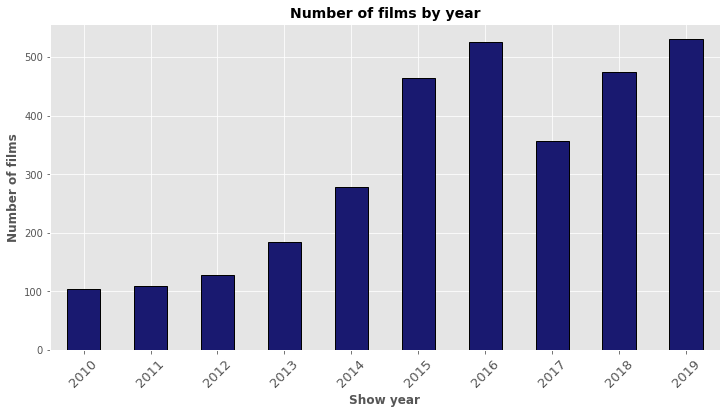

In [56]:
# group the data and visualize the number of films by year
# use a visually friendly style and adjust the grid, color and font size settings
plt.style.use('ggplot')

# average of missing values sorted in descending order
df.groupby('show_year')['box_office'].count().plot(
     kind='bar', figsize=(12,6),
     grid=True, color='midnightblue',
     edgecolor='black', linewidth=1,
)
plt.title('Number of films by year',fontsize=14, fontweight="bold")
plt.xticks(rotation = 45, fontsize = 13)
plt.xlabel('Show year',fontweight="bold")
plt.ylabel('Number of films', fontweight="bold")
plt.show()

In [57]:
# exclude NaN values when calculating the share
print(f'Proportion of films with the specified information about the distribution in cinemas is: {df.box_office.notna().mean():.2f}')

Proportion of films with the specified information about the distribution in cinemas is: 0.42


#### Let's study how the dynamics of film distribution has changed over the years. 

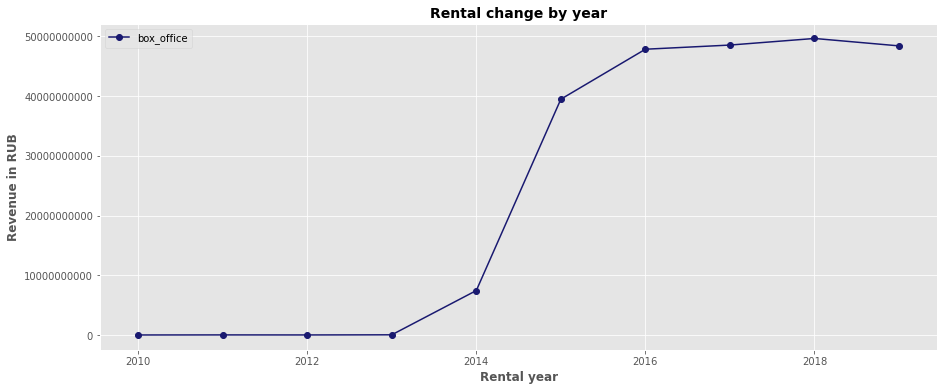

In 2010, the amount of fees was minimal, in 2018 it was maximum.


In [58]:
# group the data by years and finding a sum value of the proceeds from the rental
# use a visually friendly style and adjust the grid, color and font size settings
df.groupby('show_year')['box_office'].agg('sum').plot(
     x='year', style='o-', figsize=(15, 6), legend = True, color='midnightblue')

plt.ticklabel_format(style='plain')

plt.title('Rental change by year', fontsize=14, fontweight="bold")
plt.xlabel('Rental year', fontweight="bold")
plt.ylabel('Revenue in RUB', fontweight="bold" )
plt.show()

print(f"In {df_pivot['sum'].idxmin()}, the amount of fees was minimal, in {df_pivot['sum'].idxmax()} it was maximum.")

** Conclusion: ** Considering the amount of fees by years, from the graph we see how the maximum falls on 2018. The years from 2010 to 2013 are not taken into account, since they have the fewest values in the data. Let's assume that the minimum fee falls on 2014. In Russia, the number of cinemas and cinema halls is growing every year, and with them the number of new releases. This growth was also stimulated by the transition of distributors from film to digital screening, which ended in 2015.


#### Let's calculate the average and median fees for each year using the pivot table.

This table was built above in **p.2.7.1** Let's request it.

In [59]:
df_pivot[['mean','median']].reset_index()

,show_year,mean,median
0,2010,23130.04,1700.00
1,2011,129383.17,3000.00
2,2012,54339.24,5660.00
3,2013,161954.92,3522.50
4,2014,26684415.27,18160.00
5,2015,84940570.31,4920933.00
6,2016,91000569.85,3846679.41
7,2017,136032793.33,9968340.00
8,2018,104565059.23,8891102.21
9,2019,91369261.85,4627798.34


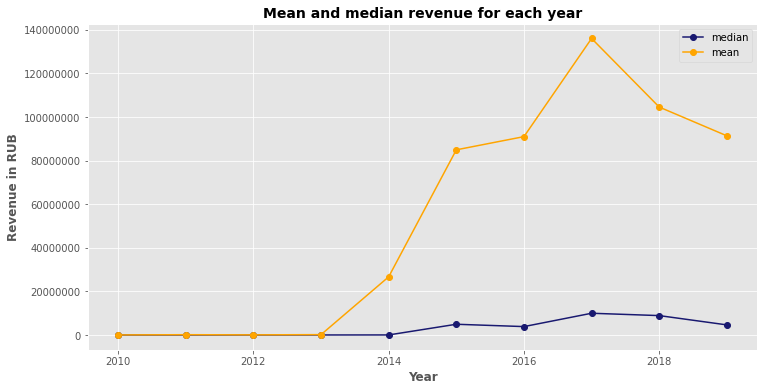

In [60]:
# use a visually friendly style and adjust the grid, color and font size settings
plt.style.use('ggplot')

df_pivot.plot(y=['median','mean'], style='-o', figsize=(12, 6), color=['midnightblue','orange'],legend = True)

plt.ticklabel_format(style='plain')

plt.title('Mean and median revenue for each year', fontsize=14, fontweight="bold")
plt.xlabel('Year', fontweight="bold")
plt.ylabel('Revenue in RUB', fontweight="bold" )
plt.show()

**Conclusion:** We observe that there is a very large scatter of data for the collections of each year. This can be seen from the difference between the mean and median. This means that there are values in the data that charge very high compared to the rest. For movies, this is normal. On average, 2017 can be considered the most profitable year. This can be seen from both the median and the average.

#### Let's determine the impact of the age limit of the audience ("6+", "12+", "16+", "18+", etc.) on the box office of the film in the period from 2015 to 2019.

Let's see films with which age limit have collected the most money at the box office? Did the picture change depending on the year? If yes, what could be the reason?

In [61]:
# we will show a pivot table by filtering the values using the query method
df.query('show_year >= 2015').groupby('age_restriction')['box_office'].sum().round().to_frame().reset_index()

,age_restriction,box_office
0,«0+» - для любой зрительской аудитории,809077426.00
1,«12+» - для детей старше 12 лет,60619446628.00
2,«16+» - для детей старше 16 лет,76034733644.00
3,«18+» - запрещено для детей,40759615572.00
4,«6+» - для детей старше 6 лет,55798610800.00


** Conclusion: ** From the resulting summary table, we see that in the period from 2015 to 2019, films of the 16+ category had the most box office revenue.

Let's see how the picture changed depending on the year using a pivot table.

In [62]:
# let's filter the values from 2015 and later and group the data by age category
df_age = df.query('2015 <= show_year').groupby(['show_year', 'age_restriction'])['box_office'] \
                             .agg('sum').reset_index()
df_age

,show_year,age_restriction,box_office
0,2015,«0+» - для любой зрительской аудитории,379054578.37
1,2015,«12+» - для детей старше 12 лет,13616082008.91
2,2015,«16+» - для детей старше 16 лет,11368120870.27
3,2015,«18+» - запрещено для детей,5432308367.44
4,2015,«6+» - для детей старше 6 лет,8701799371.41
5,2016,«0+» - для любой зрительской аудитории,150228848.67
6,2016,«12+» - для детей старше 12 лет,12204446524.39
7,2016,«16+» - для детей старше 16 лет,16664548541.74
8,2016,«18+» - запрещено для детей,6793929818.87
9,2016,«6+» - для детей старше 6 лет,12053146008.24


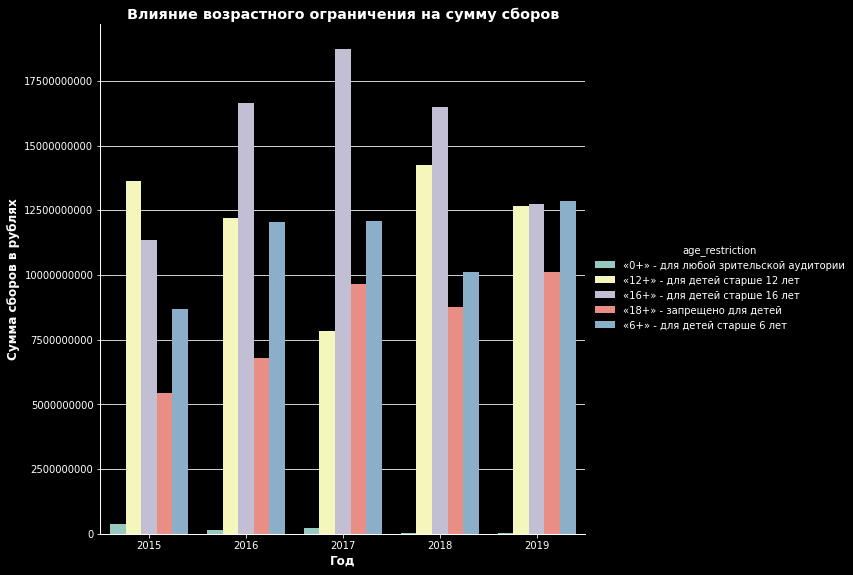

In [63]:
# visualize data using bar charts by age categories
plt.style.use("dark_background")
sns.color_palette("Set2")

sns.catplot(x='show_year', y='box_office', hue='age_restriction', data=df_age, kind='bar', height=8);

plt.ticklabel_format(axis="y", style="plain")
plt.title('Влияние возрастного ограничения на сумму сборов', fontweight="bold");
plt.xlabel('Год', fontweight="bold");
plt.ylabel('Сумма сборов в рублях', fontweight="bold");

**Conclusion:** After the obtained visualization, we observe that in 2016-2018 the largest number of revenue were received from films falling into the age category "16+" - for children over 16 years old, and in 2015 cinema 12+ was among the leaders. In 2019, the dynamics changed slightly and all categories were at about the same level. It can be assumed that for films designed for a young audience, age restrictions could play an important role and affect the box office. And the difference between "16+" and "18+" will already be significant. At the same time, the age rating can greatly complicate the life of both distributors and viewers. Once in a while, it’s not necessary, but in many cinemas, especially in the provinces, the orders of the Ministry of Culture are observed extremely strictly, and 11-year-old children, for example, are not sold tickets to Doctor Strange, and parents who came to Guardians of the Galaxy from 9- summer children are forced to write a receipt at the cash desk, they say, they realize what they are leading their child to. Possible reasons may also be changes in legislation and amendments to age limits that were adopted in the period 2015-2019.

### Researching films that have received state support.

#### Let's look for interesting patterns in the data. Let's see how much money is allocated to support the cinema. Let's check whether such films pay off well, what rating they have.

In [64]:
# select films with both reimbursable and non-refundable state support; save in a separate variable
df_financed = df[df['budget'].isna() == False]
df_financed = df_financed.drop(['punumber', 'show_start_date', 'film_studio', 'production_country', 'director', 'producer','genres'], axis=1)
df_financed

,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,support_percentage,show_year,main_director,main_genres
1281,Пока еще жива,Художественный,«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,365353.60,0.33,2013,А.Атанесян,драма
1448,Бесславные придурки,Художественный,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,NaN,28140.00,0.70,2014,А.Якимчук,unknown
1498,Невидимки,Художественный,«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,19957031.50,0.61,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,Художественный,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,55917.50,0.69,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,Художественный,«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,232100.00,0.62,2014,М.Угаров,драма
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,Художественный,«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,717703185.53,0.51,2019,А.Кравчук,история
7466,Иван Царевич и Серый Волк 4,Анимационный,«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,501069235.00,0.53,2019,Д.Шмидт,мультфильм
7474,Вторжение,Художественный,«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,NaN,0.53,2019,Ф.Бондарчук,фантастика
7476,Я свободен,Художественный,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,NaN,0.65,2019,И.Северов,драма


In [65]:
# Create a column with the total amount of government support
df_financed['total_support'] = df_financed['refundable_support'] + df_financed['nonrefundable_support']

In [66]:
# Create a payback column for a movie as the difference between the box office and the movie's budget
df_financed['payback'] = df_financed['box_office'] - df_financed['budget']

In [67]:
df_financed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  332 non-null    object 
 1   type                   332 non-null    object 
 2   age_restriction        332 non-null    object 
 3   refundable_support     332 non-null    float64
 4   nonrefundable_support  332 non-null    float64
 5   budget                 332 non-null    float64
 6   financing_source       332 non-null    object 
 7   ratings                314 non-null    float64
 8   box_office             318 non-null    float64
 9   support_percentage     332 non-null    float64
 10  show_year              332 non-null    int64  
 11  main_director          332 non-null    object 
 12  main_genres            332 non-null    object 
 13  total_support          332 non-null    float64
 14  payback                318 non-null    float64
dtypes:

#### Investigating the payback behavior of films that had government support

In [68]:
df_financed.describe().T

,count,mean,std,min,25%,50%,75%,max
refundable_support,332.00,11864457.83,24916555.26,0.00,0.00,0.00,15000000.00,180000000.00
nonrefundable_support,332.00,48980988.89,59980117.92,0.00,25000000.00,30000000.00,40375000.00,400000000.00
budget,332.00,135333300.03,188343992.03,11596761.59,46153971.75,75000067.50,151172048.25,2305074303.00
ratings,314.00,6.00,1.12,1.00,5.30,6.20,6.70,8.50
box_office,318.00,132432420.05,334837856.99,1550.00,1236675.50,15720067.71,106373008.27,3073568690.79
support_percentage,332.00,0.52,0.17,0.04,0.38,0.56,0.65,0.78
show_year,332.00,2016.72,1.64,2013.00,2015.00,2017.00,2018.00,2019.00
total_support,332.00,60845446.72,72755459.47,3000000.00,25333750.00,35000000.00,60000000.00,500000000.00
payback,318.00,-3657384.44,314572384.58,-1971477243.41,-73159279.50,-42585869.50,-11217966.87,2913568690.79


After making preliminary assessment, we may conclude that `support_percentage` column we calculated earlier in **section 2.5.1**, we see that the ratio of state support to the budget of films is on average 52%. It turns out that about half of the film's budget is funded by the state. As you can see, on average, 60,000,000 rubles were allocated to support the film. At the same time, the average payback of films with state support had a negative value of -139,747,188 rubles, and the 75% percentile of the data had a value of -70,968,828 rubles. That is, in most cases, films that received state support were unprofitable. In support of our research, we can cite data from publicly available articles of 2019: https://www.proekt.media/research/fond-kino/, https://www.rbc.ru/technology_and_media/14/12/2019/5df2610f9a79476d48fb1685 where also talks about the small number of films that have paid off and received funding from the state.

#### Let's show a graph showing the number of films that received state support by year.

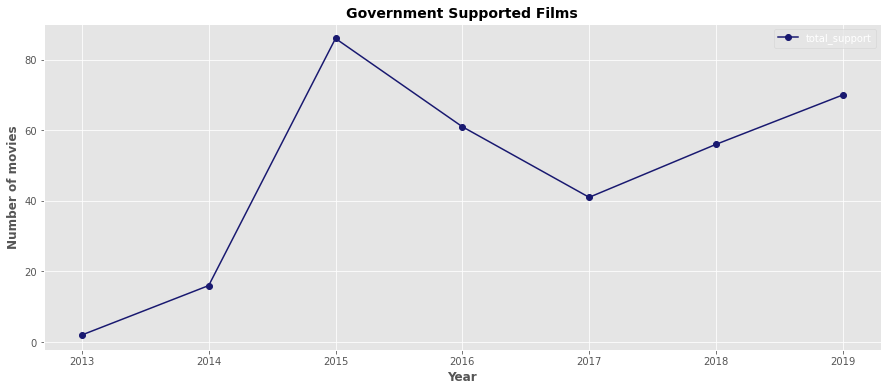

In [69]:
plt.style.use('ggplot')

df_financed.groupby('show_year')['total_support'].count().plot(x='year', style='o-', figsize=(15, 6), legend = True, color='midnightblue');

plt.title('Government Supported Films', fontsize=14, fontweight="bold", color='black');
plt.xlabel('Year', fontweight="bold");
plt.ylabel('Number of movies', fontweight="bold");


In [70]:
df_financed.groupby('show_year')['total_support'].sum()

show_year
2013    134347945.00
2014    572002299.00
2015   3656241459.00
2016   4303155482.00
2017   3183971662.00
2018   3446969465.00
2019   4904000000.00
Name: total_support, dtype: float64

**Conclusion:** Based on the graph, we see that the largest number of films that received state support came out in 2015. The next year in terms of the amount of state support is 2019 with a record financing of films in the amount of 4.9 billion rubles.

#### What genres of films were the most popular when receiving state support?

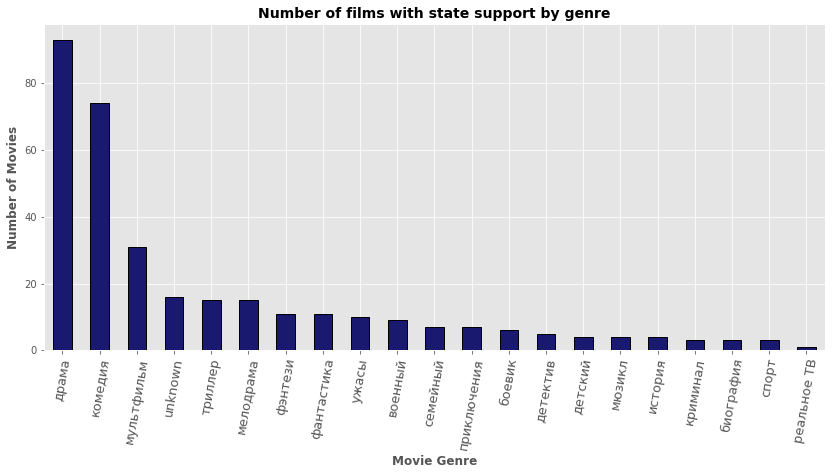

In [71]:
# use a visually friendly style and adjust the grid, color and font size settings
plt.style.use('ggplot')

df_financed['main_genres'].value_counts().plot(
    kind='bar', figsize=(14,6), 
    grid=True, color='midnightblue', 
    edgecolor='black', linewidth=1
)
plt.xticks(rotation = 80, fontsize = 13)
plt.title('Number of films with state support by genre',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Movie Genre',fontweight="bold")
plt.ylabel('Number of Movies', fontweight="bold")
plt.show()

**Conclusion:** We can see that the most popular genres among films that received state support in 2013-2019 were dramas, comedies and cartoons. And the smallest amount of support from the state received pictures related to real television and sports.

#### Посмотрим окупаемость фильмов в зависимости от жанров

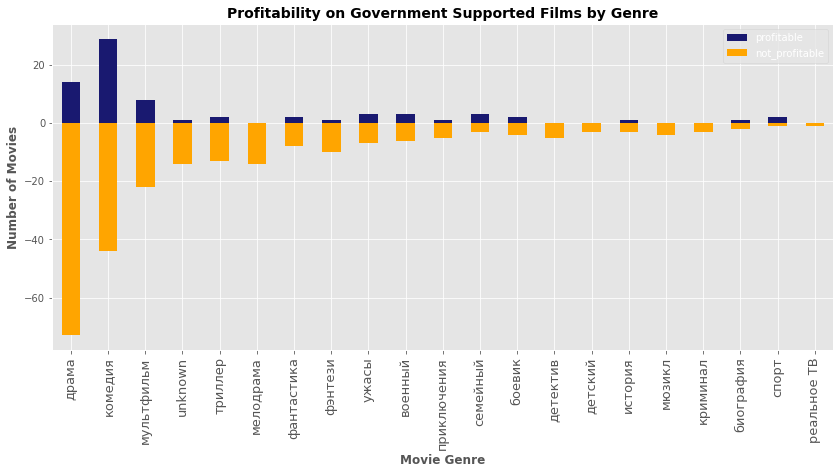

In [72]:
# create columns that will reflect the profitability of films
df_financed['profitable'] = df_financed['payback'] > 0
df_financed['not_profitable'] = df_financed['payback'] < 0

# group the data and build a bar chart in both directions
df_financed.groupby('main_genres') \
             .agg({'title': 'count',
                   'profitable': 'sum',
                   'not_profitable': lambda x: 0 - x.sum()}) \
             .sort_values(by='title',
                          ascending=False) \
             .plot(kind='bar', figsize=(14,6),
                   grid=True, stacked=True, color=['midnightblue','orange'],
                   y=['profitable', 'not_profitable'])
plt.xticks(fontsize=13)
plt.title('Profitability on Government Supported Films by Genre',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Movie Genre',fontweight="bold")
plt.ylabel('Number of Movies', fontweight="bold")
plt.show()
pass

** Conclusion: ** Based on the constructed bar chart, we notice that there are much more unprofitable films than those that paid off (where the box office exceeded the total budget by 2 times). This proves our assumption of non-payback in Section 3.1.2.

In [73]:
df_financed.sample(5)

,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,support_percentage,show_year,main_director,main_genres,total_support,payback,profitable,not_profitable
6564,Снежная Королева: Зазеркалье,Анимационный,«6+» - для детей старше 6 лет,60000000.00,60000000.00,356550000.00,Фонд кино,6.40,185318326.02,0.34,2018,А.Цицилин,мультфильм,120000000.00,-171231673.98,False,True
2838,Врач (2015),Художественный,«16+» - для детей старше 16 лет,0.00,25000000.00,39000000.00,Министерство культуры,6.20,456626.50,0.64,2016,Г.Куценко (Ю.Куценко),драма,25000000.00,-38543373.50,False,True
3157,ХИТ,Художественный,«16+» - для детей старше 16 лет,0.00,21700000.00,37000990.00,Министерство культуры,7.70,129333.50,0.59,2015,М.Михайлова,драма,21700000.00,-36871656.50,False,True
5641,Ёлки Новые,Художественный,«6+» - для детей старше 6 лет,50000000.00,50000000.00,174381922.00,Фонд кино,5.80,855451052.00,0.57,2017,Д.Киселев,комедия,100000000.00,681069130.00,True,False
5661,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",Художественный,«0+» - для любой зрительской аудитории,0.00,25000000.00,44600000.00,Министерство культуры,7.20,NaN,0.56,2017,Е.Соколов,детский,25000000.00,NaN,False,False


#### Movie rating and addiction search

Let's visualize the rating of the main genres of films and see which genre of the film is leading by the average rating among the films that received state support.

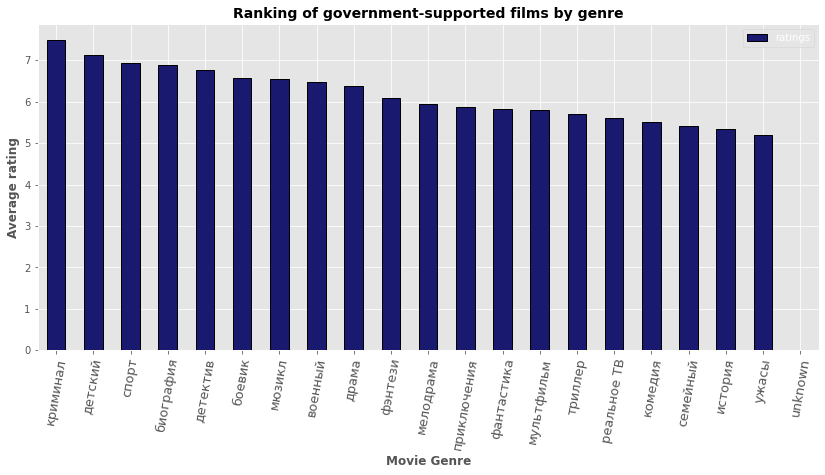

In [74]:
# let's group the data by the main genre and calculate the average ratings
df_financed[['main_genres', 'ratings']].groupby('main_genres') \
                                         .agg('mean') \
                                         .sort_values(by='ratings', ascending=False) \
                                         .plot(kind='bar', figsize=(14,6),
     grid=True, color='midnightblue',
     edgecolor='black', linewidth=1
)
plt.xticks(rotation = 80, fontsize = 13)
plt.title('Ranking of government-supported films by genre',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Movie Genre',fontweight="bold")
plt.ylabel('Average rating', fontweight="bold")
plt.show()

**Conclusion:** Crime and children's films are among the films with the highest rating. And the least popular will be horror films.

#### Let's try to determine the presence of a linear relationship between the values using correlation and subsequent visualization.

In [75]:
# correlation for the selected numerical values of our dataframe
df_financed[['total_support','budget','ratings','box_office','support_percentage','payback']].corr()

,total_support,budget,ratings,box_office,support_percentage,payback
total_support,1.00,0.75,0.12,0.49,0.09,0.09
budget,0.75,1.00,0.10,0.38,-0.29,-0.18
ratings,0.12,0.10,1.00,0.16,-0.02,0.10
box_office,0.49,0.38,0.16,1.00,-0.12,0.84
support_percentage,0.09,-0.29,-0.02,-0.12,1.00,0.06
payback,0.09,-0.18,0.10,0.84,0.06,1.00


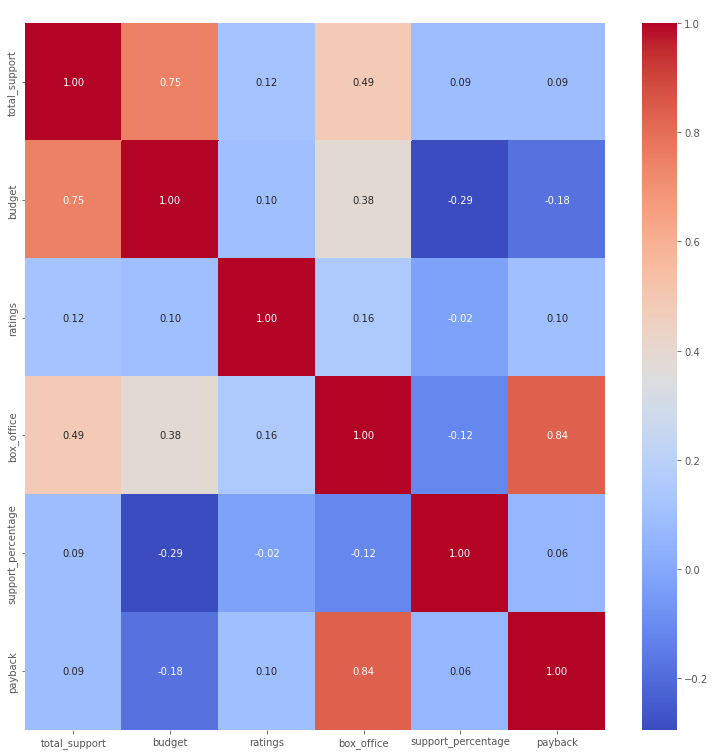

In [77]:
# then, we build a heat map, round the correlation coefficients to 2 digits
plt.figure(figsize=(13,13))
sns.heatmap(df_financed[['total_support','budget','ratings','box_office','support_percentage','payback']]. \
             corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Correlation')
plt.show()

**Conclusion:** By examining the relationship of several variables using the heatmap, we see that a positive Pearson correlation coefficient indicates a strong impact of total government support on the budget of films. This is quite obvious, because the larger the amount of support, the larger the total budget. The dependence of the amount of state support and box office receipts on the film's rental on the film's rating is very weak (or non-linear), so we cannot say that the more expensive the film, the higher its rating. For other parameters, the correlation coefficient is almost zero. It can be argued that the linear relationship is weak or absent altogether. It happens that the coefficient is zero, not because there is no connection between the values, but because it has a more complex, non-linear character. Therefore, the correlation coefficient does not take such a relationship.

#### Dependence of the rating on the amount of state support

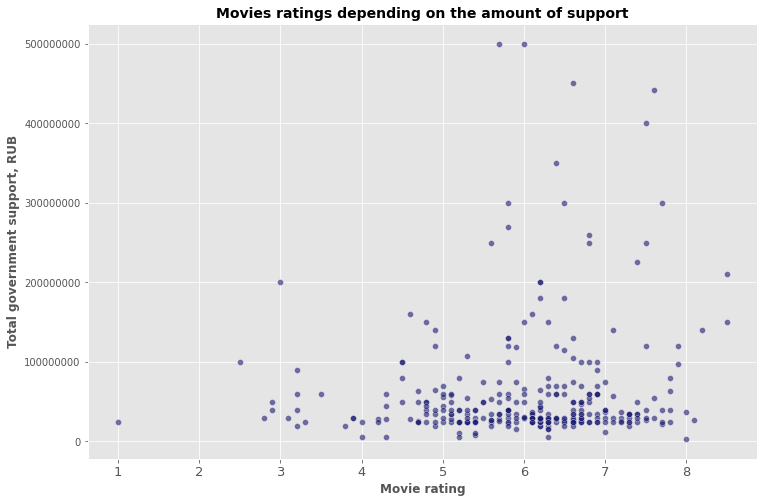

In [79]:
# view the scatterplot by visualization
fig = plt.figure(figsize=(12, 8))

sns.scatterplot(x=df_financed["ratings"], y=df_financed["total_support"], alpha=0.6, color='midnightblue')

plt.ticklabel_format(axis="y", style="plain")
plt.xticks(fontsize=13)
plt.title('Movies ratings depending on the amount of support',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Movie rating',fontweight="bold")
plt.ylabel('Total government support, RUB', fontweight="bold")
plt.show()

**Conclusion:** From scatter diagram, we notice that our sample is dominated by pictures with state support of up to 100 million rubles. Films with a total support of more than 200 million rubles, usually, did not have ratings below 5 points. Films that received more than 300 million rubles of state support do not tend to increase their ratings. Any specific impact of the amount of state. support for the rating of the film could not be found. From our scatter diagram, we can find confirmation of clause 3.1.7 (correlation table) that from an increase in state support for a film, its rating does not always increase linearly.

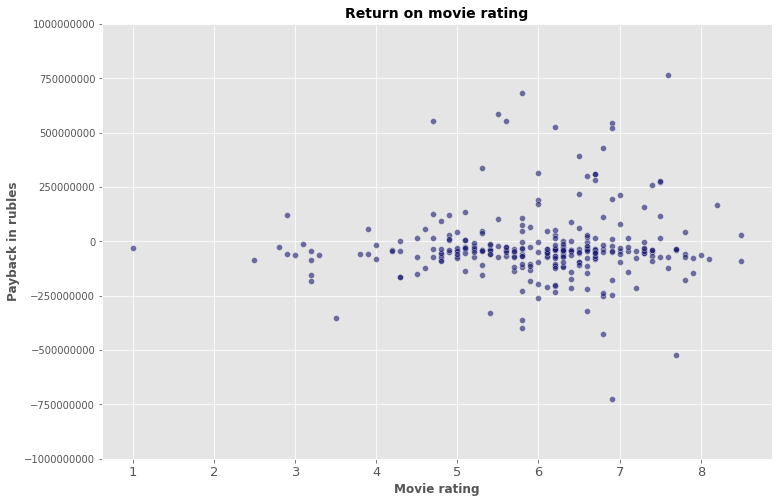

In [80]:
# view the scatterplot by setting the visualization
fig = plt.figure(figsize=(12, 8))

sns.scatterplot(x=df_financed["ratings"], y=df_financed["payback"], alpha=0.6, color='midnightblue')
plt.ylim(-1000000000, 1000000000);

plt.ticklabel_format(axis="y", style="plain")
plt.xticks(fontsize=13)
plt.title('Return on movie rating',fontsize=14, fontweight="bold", color="black")
plt.xlabel('Movie rating',fontweight="bold")
plt.ylabel('Payback in rubles', fontweight="bold")
plt.show()

## General conclusion from our EDA data analysis

We made a full preliminary data preparation for analysis and searched for various dependencies between films which received government support and other known parameters. Some anomalies in the data have been pre-processed and corrected. As such, in the total budget of films there were zero values, despite the fact that those films received a returnable or non-refundable state. support. We corrected this by filling in the zero budget values with the value of the dependence of the total budget on the amount of state support (the sum of repayable funds and non-refundable funds). For a more accurate analysis, we could recommend a manual search for films and the budget of each of them on such sites as Kinopoisk, Film.ru, etc. The sample for our further analysis of films is only from the state. support amounted to a little more than 10% of the initial dataset. After analyzing the data and constructing the corresponding graphs, we saw that the ratio of state support to the budget of films is on average 52%. That is, about half of the picture's budget was financed by the state. On average, 60,000,000 rubles were allocated to support the film. At the same time, the average payback of films with state support was negative, and the 75% percentile of our data was -11,217,966 rubles. That is, in most cases, films that received state support were still unprofitable. In support of our research, we cited data from publicly available sources. For example, the RBC resource says: “According to the results of eleven months of 2019, only one of the eight films that received state subsidies turned out to be commercially successful. The Accounts Chamber had previously raised questions about the system of state support for domestic cinema.” An interesting fact is that in order for a film to become commercially successful, it needs to collect at the box office twice as much as was spent on it. We also found out that there is no specific (linear) dependence of the film's payback on its rating or the dependence of the film's rating on the amount of state money. support. There are both well-paid films with ratings of 5-6 points, and large "failures" with a rating of more than 7. This is explained by the fact that the economics of film production assumes that one successful film pays for the other nine unsuccessful ones, "so the ratio that we we see on the Russian film market, it’s normal for the industry as a whole.” Another thing is that these nine unsuccessful ones belong to different studios, producers, so there will inevitably be winners and losers.

I used the following sources to test my hypotheses:
- https://www.proekt.media/research/fond-kino/
- https://www.rbc.ru/technology_and_media/14/12/2019/5df2610f9a79476d48fb1685
- https://www.kinopoisk.ru/